# Artificial Intelligence UE
## Exercises 2 - Heuristic Search

In this exercise you will implement two heuristic search algorithms: Greedy Best First Search and A* search. We also look at a few different heuristics to test out the algorithms. 

The algorithms have been explained in the lecture (VO) and we provide some additional hints for the different heuristics below. Please refer to the lecture slides (VO) for the pseudo algorithms.

<div class="alert alert-warning">

<p><strong>Practical hints:</strong></p>
<ul>

<li>Replace the placeholders <code># YOUR CODE HERE</code>, <code>raise NotImplementedError()</code> with your code.</li>
<li>Do not rename any of the already existing variables (this might lead to hidden tests failing / not working).</li>
<li><code>solve()</code> should return the found solution node or <code>None</code> if no solution is found. You do not need to store the path, the function <code>node.get_action_sequence()</code> can be used to retrieve it later via backtracking.</li>
<li>The heuristics return <code>-1</code> for now; change them so that they return the distance that they represent!</li>
<li>Use a <code>set()</code> to store already visited nodes (when needed).</li>
<li>Use the imported data structures <code>Queue</code>, <code>Stack</code>, and <code>PriorityQueue</code> as the fringe / frontier (choose the right datatype depending on the algorithm)</li>
</ul>
</div>

In [1]:
# import stuff
from pig_lite.problem.base import Problem, Node
from pig_lite.datastructures.queue import Queue
from pig_lite.datastructures.stack import Stack
from pig_lite.datastructures.priority_queue import PriorityQueue
from pig_lite.instance_generation.problem_factory import ProblemFactory

import math
import random
import numpy as np

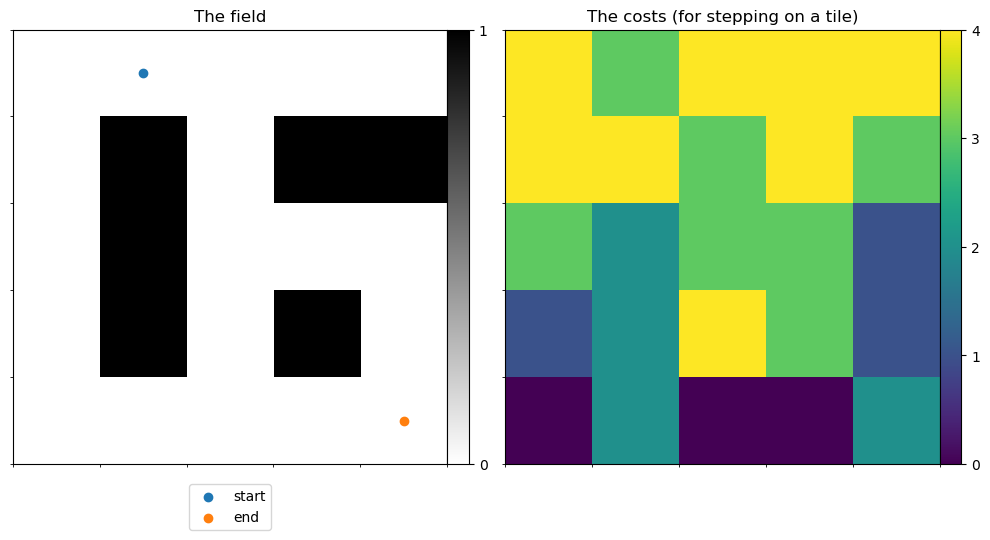

In [2]:
# as a reminder, this way we can visualize a particular problem (here: a maze)
factory = ProblemFactory()
maze = factory.create_problem_from_json(json_path='boards/tiny0.json')
maze.visualize()

<div class="alert alert-warning">
Now it's your turn to implement some heuristics and search algorithms - all spots that need your attention are marked with <code># YOUR CODE HERE</code>!
</div>

## Implementing Heuristics

Here, you first have to implement several heuristics:
- [Manhattan (City block) distance](https://en.wikipedia.org/wiki/Taxicab_geometry)
- [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance)
- [Chebyshev distance](https://en.wikipedia.org/wiki/Chebyshev_distance)

For comparison, we also provide you with a random distance heuristic - feel free to use them for debugging your implementations if it helps! 

In [19]:
# this is a random heuristic - it returns a random number as the distance between two nodes
# we use it for testing - you can also use it for debbuging if you want
def random_heuristic(current: Node, goal: Node):
    return random.random()

def cityblock_heuristic(current: Node, goal: Node):
    (currentX, currentY) = current.state
    (goalX, goalY) = goal.state
    return abs(currentX - goalX) + abs(currentY - goalY)

def euclidean_heuristic(current: Node, goal: Node):
    (currentX, currentY) = current.state
    (goalX, goalY) = goal.state
    return math.sqrt((currentX - goalX)**2 + (currentY - goalY)**2)

def chebyshev_heuristic(current: Node, goal: Node):
    (currentX, currentY) = current.state
    (goalX, goalY) = goal.state
    return max(abs(currentX - goalX), abs(currentY - goalY))

### Check City Block Heuristic

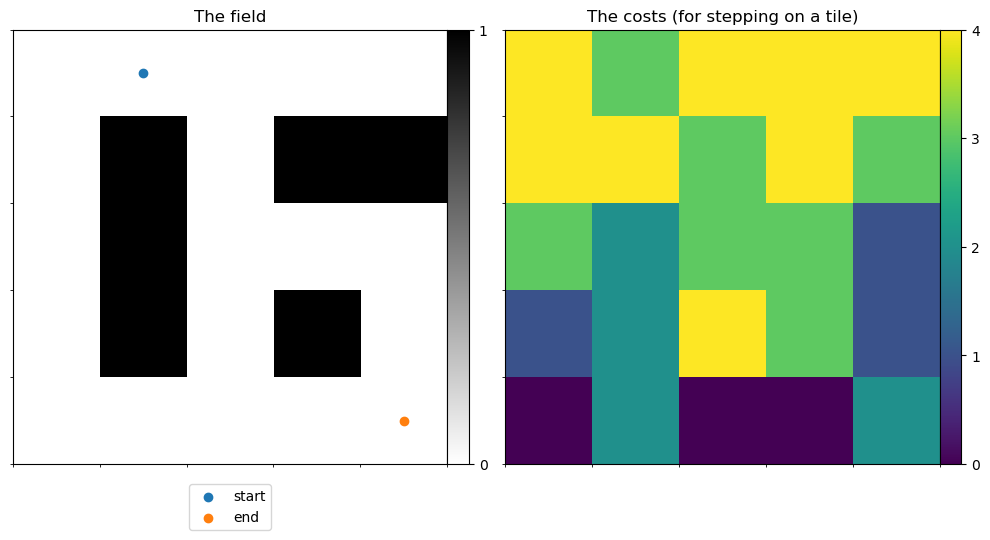

In [20]:
# this is a testing cell, do not edit or delete
maze = ProblemFactory().create_problem_from_json(json_path='boards/tiny0.json')
maze.visualize()

assert(cityblock_heuristic(maze.get_start_node(), maze.get_end_node()) != -1), "it seems like you might not have implemented this heuristic yet, the distance is -1"
assert(cityblock_heuristic(maze.get_start_node(), maze.get_end_node()) == 7.0), "the city block heuristic returned the wrong distance between start and end node"
assert(cityblock_heuristic(Node(None, [2, 3], None, 0, 0), maze.get_end_node()) == 3.0), "the city block heuristic returned the wrong distance between arbitrary node and end"

### Check Euclidean Heuristic

In [21]:
# this is a testing cell, do not edit or delete
maze = ProblemFactory().create_problem_from_json(json_path='boards/tiny0.json')

assert(euclidean_heuristic(maze.get_start_node(), maze.get_end_node()) != -1), "it seems like you might not have implemented this heuristic yet, the distance is -1"
assert(math.isclose(euclidean_heuristic(maze.get_start_node(), maze.get_end_node()), 5.0)), "the euclidean heuristic returned the wrong distance between start and end node"
assert(math.isclose(euclidean_heuristic(Node(None, [2, 3], None, 0, 0), maze.get_end_node()), 2.23606797749979)), "the euclidean heuristic returned the wrong distance between arbitrary node and end"

### Check Chebyshev Heuristic

In [22]:
# this is a testing cell, do not edit or delete
maze = ProblemFactory().create_problem_from_json(json_path='boards/tiny0.json')

assert(chebyshev_heuristic(maze.get_start_node(), maze.get_end_node()) != -1), "it seems like you might not have implemented this heuristic yet, the distance is -1"
assert(chebyshev_heuristic(maze.get_start_node(), maze.get_end_node()) == 4.0), "the chebyshev heuristic returned the wrong distance between start and end node"
assert(chebyshev_heuristic(Node(None, [2, 3], None, 0, 0), maze.get_end_node()) == 2.0), "the chebyshev heuristic returned the wrong distance between arbitrary node and end"

## Implementing GBFS


state (4, 4) was reached following the sequence ['R', 'D', 'D', 'R', 'R', 'D', 'D'] (cost: 17, depth: 7)


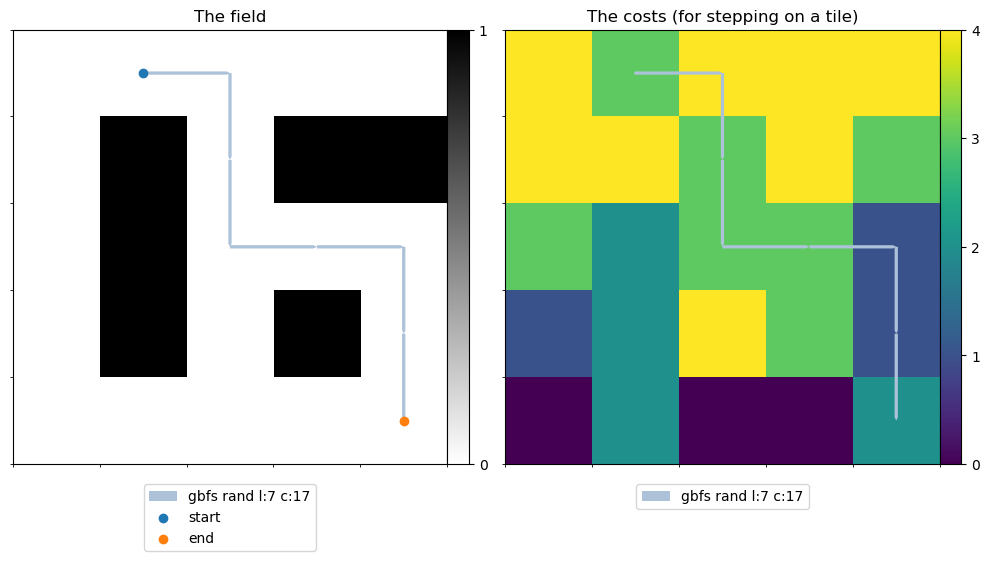

In [43]:
class GBFS(object):
    def __init__(self, heuristic):
        
        self.heuristic = heuristic
        self.visited = None
        self.fringe = None
    
    def solve(self, problem: Problem):
        
        # YOUR CODE HERE: make sure to initialise self.visited and self.fringe here!
        self.fringe = PriorityQueue()
        self.visited = set()
        end_node = problem.get_end_node()
        self.fringe.put(self.heuristic(problem.get_start_node(), end_node), problem.get_start_node())

        while self.fringe.has_elements():
            current = self.fringe.get()
            
            if problem.is_end(current):
                return current

            if current in self.visited:
                continue

            self.visited.add(current)
            for successor in problem.successors(current):
                self.fringe.put(self.heuristic(successor, end_node), successor)
            
            
        return None


# reset maze before search
maze.reset()
gbfs_rand = GBFS(random_heuristic)
gbfs_rand_sol = gbfs_rand.solve(maze)
if gbfs_rand_sol is not None: 
    gbfs_rand_sol.pretty_print()
    maze.visualize(sequences=[('gbfs rand', "".join(maze.get_action_sequence(gbfs_rand_sol)))])

### Basic checks

In [44]:
# this is a testing cell, do not edit or delete
assert(gbfs_rand_sol is not None), "GBFS did not return a solution"
assert(gbfs_rand_sol.state == (4, 4)), "GBFS did not return the expected solution"

assert(gbfs_rand.visited is not None), "it seems you did not correctly initialize the visited set"
assert(gbfs_rand.fringe is not None), "it seems you did not correctly initialize the fringe"

In [45]:
maze.reset()
gbfs_cb_sol = GBFS(cityblock_heuristic).solve(maze)
assert(gbfs_cb_sol.depth == 7), "the solution found by city block-GBFS does not have the expected length"
assert(gbfs_cb_sol.cost == 17), "the solution found by city block-GBFS does not have the expected cost"

### Check different mazes

In [46]:
tiny1 = factory.create_problem_from_json(json_path='boards/tiny1.json')
assert(GBFS(cityblock_heuristic).solve(tiny1).get_action_sequence_hash() == '0123d362bf2df8f84e7c41197827be005159724c07774ef32d9f15373a440091'), "City block-GBFS did not return the expected solution path"

In [47]:
tiny1 = factory.create_problem_from_json(json_path='boards/tiny1.json')
assert(GBFS(euclidean_heuristic).solve(tiny1).get_action_sequence_hash() == 'c283a9803562a0053fc1ea0c30d421e0b4a7a9f599c699d74477cbeeffec23bc'), "Euclidean-GBFS did not return the expected solution path"

In [48]:
tiny2 = factory.create_problem_from_json(json_path='boards/tiny2.json')
assert(GBFS(cityblock_heuristic).solve(tiny2).get_action_sequence_hash() == 'f5cdd7625f98bc258a52c4c332d534d9c2d9bfebc34ef4c26c11b85e15803363'), "City block-GBFS did not return the expected solution path"

In [49]:
tiny2 = factory.create_problem_from_json(json_path='boards/tiny2.json')
assert(GBFS(chebyshev_heuristic).solve(tiny2).get_action_sequence_hash() == '919c8fb20a877be0b0da8aeda03a070febb5607348e0c7f733c2405fdb9b4f74'), "Chebyshev-GBFS did not return the expected solution path"

In [50]:
tiny3 = factory.create_problem_from_json(json_path='boards/tiny3.json')
assert(GBFS(cityblock_heuristic).solve(tiny3).get_action_sequence_hash() == '0123d362bf2df8f84e7c41197827be005159724c07774ef32d9f15373a440091'), "City block-GBFS did not return the expected solution path"

In [51]:
tiny3 = factory.create_problem_from_json(json_path='boards/tiny3.json')
assert(GBFS(euclidean_heuristic).solve(tiny3).get_action_sequence_hash() == 'c283a9803562a0053fc1ea0c30d421e0b4a7a9f599c699d74477cbeeffec23bc'), "Euclidean-GBFS did not return the expected solution path"

## Implementing A*


state (4, 4) was reached following the sequence ['R', 'D', 'D', 'D', 'D', 'R', 'R'] (cost: 16, depth: 7)


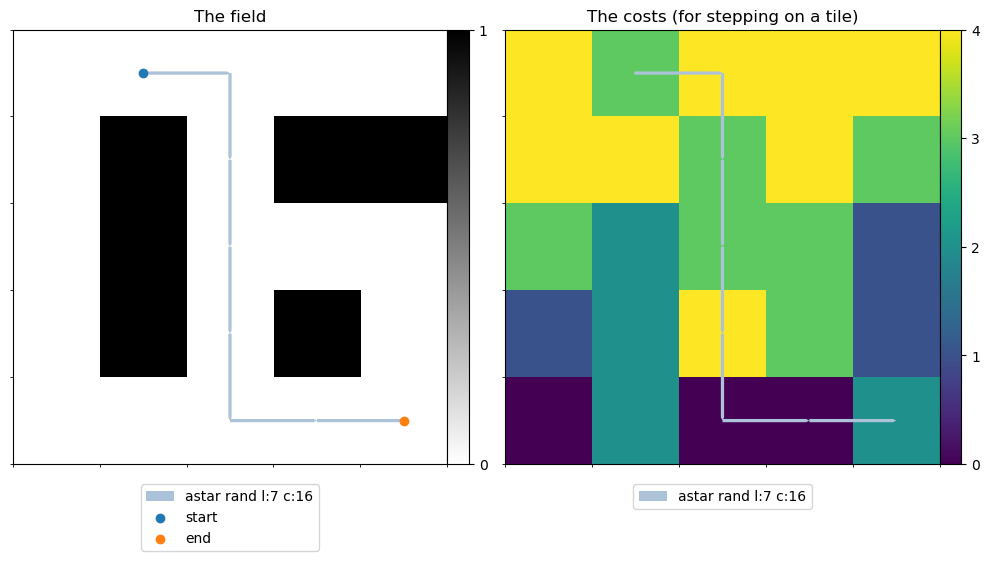

In [52]:
class ASTAR(object):
    def __init__(self, heuristic):
        self.heuristic = heuristic
        self.visited = None
        self.fringe = None
    
    def solve(self, problem: Problem):
        # YOUR CODE HERE: make sure to initialise self.visited and self.fringe here!
        self.fringe = PriorityQueue()
        self.visited = set()
        end_node = problem.get_end_node()
        start_node = problem.get_start_node()
        self.fringe.put(self.heuristic(start_node, end_node), start_node)
        values = {start_node: 0}

        while self.fringe.has_elements():
            current = self.fringe.get()
            
            if problem.is_end(current):
                return current

            if current in self.visited:
                continue

            self.visited.add(current)
            for successor in problem.successors(current):
                tentative = values[current] + successor.cost

                if successor not in values or tentative < values[successor]:
                    values[successor] = tentative
                    self.fringe.put(self.heuristic(successor, end_node) + tentative, successor)
            
            
        return None


# reset maze before search
maze.reset()
astar_rand = ASTAR(random_heuristic)
astar_rand_sol = astar_rand.solve(maze)
if astar_rand_sol is not None:
    astar_rand_sol.pretty_print()
    maze.visualize(sequences=[('astar rand', "".join(maze.get_action_sequence(astar_rand_sol)))])

### Basic checks

In [53]:
# this is a testing cell, do not edit or delete

assert(astar_rand_sol is not None), "A* did not return a solution"
assert(astar_rand_sol.state == (4, 4)), "A* did not return the expected solution"
assert(astar_rand.visited is not None), "it seems you did not correctly initialize the visited set"
assert(astar_rand.fringe is not None), "it seems you did not correctly initialize the fringe"


In [54]:
maze.reset()
astar_cb_sol = ASTAR(cityblock_heuristic).solve(maze)
assert(astar_cb_sol.depth == 7), "the solution found by city block-A* does not have the expected length"
assert(astar_cb_sol.cost == 16), "the solution found by city block-A* does not have the expected cost"

### Check different mazes

In [55]:
tiny1 = factory.create_problem_from_json(json_path='boards/tiny1.json')
assert(ASTAR(cityblock_heuristic).solve(tiny1).get_action_sequence_hash() == '0123d362bf2df8f84e7c41197827be005159724c07774ef32d9f15373a440091'), "City block-A* did not return the expected solution path"

In [56]:
tiny1 = factory.create_problem_from_json(json_path='boards/tiny1.json')
assert(ASTAR(chebyshev_heuristic).solve(tiny1).get_action_sequence_hash() == '0123d362bf2df8f84e7c41197827be005159724c07774ef32d9f15373a440091'), "Chebyshev-A* did not return the expected solution path"

In [57]:
tiny2 = factory.create_problem_from_json(json_path='boards/tiny2.json')
assert(ASTAR(cityblock_heuristic).solve(tiny2).get_action_sequence_hash() == '919c8fb20a877be0b0da8aeda03a070febb5607348e0c7f733c2405fdb9b4f74'), "City block-A* did not return the expected solution path"

In [58]:
tiny2 = factory.create_problem_from_json(json_path='boards/tiny2.json')
assert(ASTAR(euclidean_heuristic).solve(tiny2).get_action_sequence_hash() == '919c8fb20a877be0b0da8aeda03a070febb5607348e0c7f733c2405fdb9b4f74'), "Euclidean-A* did not return the expected solution path"

In [59]:
tiny3 = factory.create_problem_from_json(json_path='boards/tiny3.json')
assert(ASTAR(cityblock_heuristic).solve(tiny3).get_action_sequence_hash() == '061c3912f2db8f3b1418829bc321fea4dfddba01ad42d45cecf22aed99a74475'), "City block-A* did not return the expected solution path"

In [61]:
tiny0 = factory.create_problem_from_json(json_path='boards/tiny0.json')
assert(ASTAR(chebyshev_heuristic).solve(tiny3).get_action_sequence_hash() == '061c3912f2db8f3b1418829bc321fea4dfddba01ad42d45cecf22aed99a74475'), "Chebyshev-A* did not return the expected solution path"